<a href="https://colab.research.google.com/github/chiranjeevi-manike/IBM-Cognitiveclass.ai/blob/main/Adult_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:

...
# define the dataset location
filename = 'adult-all.csv'
# load the csv file as a data frame
dataframe = read_csv(filename, header=None, na_values='?')

In [ ]:
...
# drop rows with missing
dataframe = dataframe.dropna()

In [ ]:
...
# summarize the shape of the dataset
print(dataframe.shape)

(45222, 15)


In [ ]:
...
# summarize the class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

NameError: ignored

>CART 0.811 (0.006)


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>SVM 0.837 (0.005)
>BAG 0.847 (0.006)
>RF 0.844 (0.006)
>GBM 0.840 (0.004)


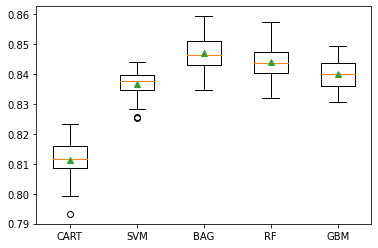

In [ ]:
# spot check machine learning algorithms on the adult imbalanced dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

# load the dataset
def load_dataset(full_path):
	# load the dataset as a numpy array
	dataframe = read_csv(full_path, header=None, na_values='?')
	# drop rows with missing
	dataframe = dataframe.dropna()
	# split into inputs and outputs
	last_ix = len(dataframe.columns) - 1
	X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
	# select categorical and numerical features
	cat_ix = X.select_dtypes(include=['object', 'bool']).columns
	num_ix = X.select_dtypes(include=['int64', 'float64']).columns
	# label encode the target variable to have the classes 0 and 1
	y = LabelEncoder().fit_transform(y)
	return X.values, y, cat_ix, num_ix

# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define models to test
def get_models():
	models, names = list(), list()
	# CART
	models.append(DecisionTreeClassifier())
	names.append('CART')
	# SVM
	models.append(SVC(gamma='scale'))
	names.append('SVM')
	# Bagging
	models.append(BaggingClassifier(n_estimators=10))
	names.append('BAG')
	# RF
	models.append(RandomForestClassifier(n_estimators=10))
	names.append('RF')
	# GBM
	models.append(GradientBoostingClassifier(n_estimators=10))
	names.append('GBM')
	return models, names

# define the location of the dataset
full_path = 'adult-all.csv'
# load the dataset
X, y, cat_ix, num_ix = load_dataset(full_path)
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
	# define steps
	steps = [('c',OneHotEncoder(handle_unknown='ignore'),cat_ix), ('n',MinMaxScaler(),num_ix)]
	# one hot encode categorical, normalize numerical
	ct = ColumnTransformer(steps)
	# wrap the model i a pipeline
	pipeline = Pipeline(steps=[('t',ct),('m',models[i])])
	# evaluate the model and store results
	scores = evaluate_model(X, y, pipeline)
	results.append(scores)
	# summarize performance
	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

**Get the Data**

In [2]:
df = pd.read_csv('00 df.csv')
df = df[df['flag']=='train']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  32561 non-null  object
 1   occupation_bin      32561 non-null  object
 2   msr_bin             32561 non-null  object
 3   capital_gl_bin      32561 non-null  object
 4   race_sex_bin        32561 non-null  object
 5   education_num_bin   32561 non-null  object
 6   education_bin       32561 non-null  object
 7   workclass_bin       32561 non-null  object
 8   age_bin             32561 non-null  object
 9   flag                32561 non-null  object
 10  y                   32561 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 3.0+ MB


**Exploratory Data Analysis**

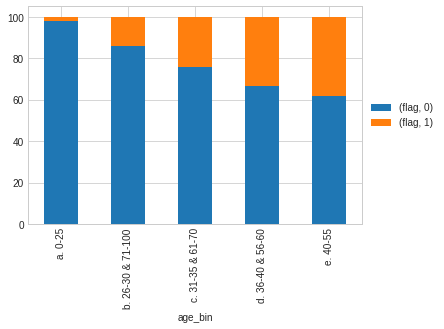

In [3]:
#age_bin
x_chart = df.pivot_table(values=['flag'], index=['age_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

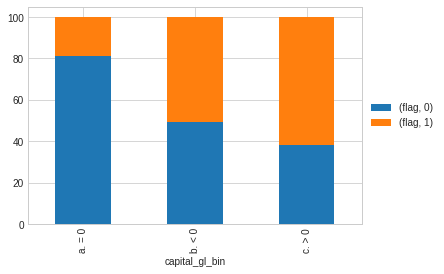

In [4]:
#capital_gl_bin
x_chart = df.pivot_table(values=['flag'], index=['capital_gl_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

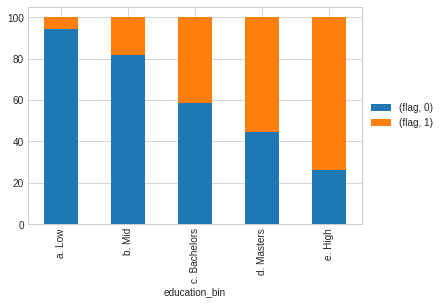

In [5]:
#education_bin
x_chart = df.pivot_table(values=['flag'], index=['education_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

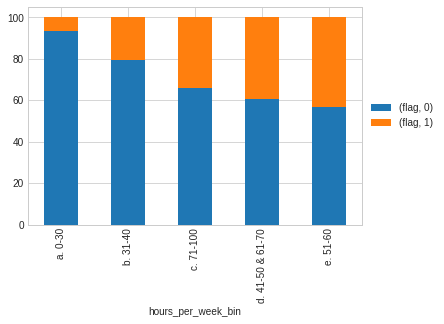

In [6]:
#hours_per_week_bin
x_chart = df.pivot_table(values=['flag'], index=['hours_per_week_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

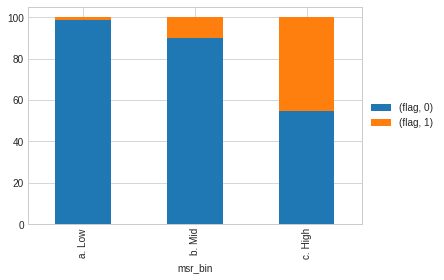

In [7]:
#msr_bin
x_chart = df.pivot_table(values=['flag'], index=['msr_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

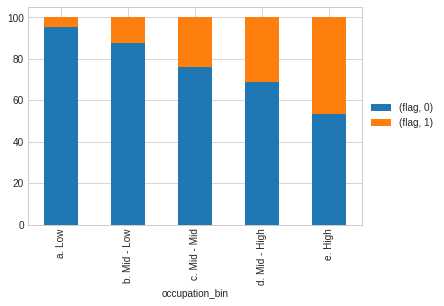

In [8]:
#occupation_bin
x_chart = df.pivot_table(values=['flag'], index=['occupation_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

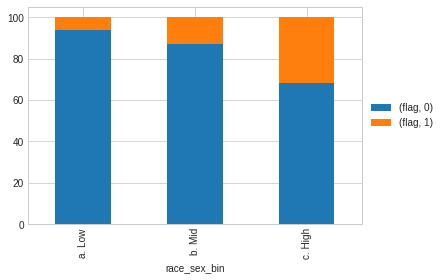

In [9]:
#race_sex_bin
x_chart = df.pivot_table(values=['flag'], index=['race_sex_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))